In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("C:\Python, Jupyter, Pandas Code\output.csv")
df.head()

,location,state,do,ph,co,bod,na,tc,year,wqi
0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014,79.28
1,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014,69.34
2,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014,77.14
3,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014,77.14
4,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.3,5672.0,2014,75.44


In [10]:
df=df.drop('state',axis=1)

In [11]:
for col in df. columns:
    df[col].replace('?',np.NaN,inplace=True)

In [12]:
df['location'].fillna(df['location'].mode()[0],inplace=True)
df['do'].fillna(df['do'].mode()[0],inplace=True)
df['ph'].fillna(df['ph'].mode()[0],inplace=True)
df['co'].fillna(df['co'].mode()[0],inplace=True)
df['bod'].fillna(df['bod'].mode()[0],inplace=True)
df['na'].fillna(df['na'].mode()[0],inplace=True)
df['tc'].fillna(df['tc'].mode()[0],inplace=True)
df['year'].fillna(df['year'].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

location    0
do          0
ph          0
co          0
bod         0
na          0
tc          0
year        0
wqi         0
dtype: int64

In [117]:
#Removing locations since not an attribute
location = df['location']
year = df['year']

In [125]:

df_new =df_new.drop('year',axis=1)

In [126]:
df_new

,do,ph,co,bod,na,tc,wqi
0,6.300,6.900,179.0,1.7,0.1,5330.0,79.28
1,5.800,6.900,64.0,3.8,0.5,8443.0,69.34
2,5.800,7.300,83.0,1.9,0.4,5500.0,77.14
3,5.500,7.400,81.0,1.5,0.1,4049.0,77.14
4,6.100,6.700,308.0,1.4,0.3,5672.0,75.44
...,...,...,...,...,...,...,...
1772,4.600,3.000,350.0,6.2,2.2,49.0,56.18
1773,8.800,7.000,172.0,1.6,5.0,2800.0,82.58
1774,10.000,7.100,150.0,1.0,4.0,350.0,88.38
1775,9.000,7.300,158.0,1.8,7.2,280.0,88.20


In [127]:
df_new

,do,ph,co,bod,na,tc,wqi
0,6.300,6.900,179.0,1.7,0.1,5330.0,79.28
1,5.800,6.900,64.0,3.8,0.5,8443.0,69.34
2,5.800,7.300,83.0,1.9,0.4,5500.0,77.14
3,5.500,7.400,81.0,1.5,0.1,4049.0,77.14
4,6.100,6.700,308.0,1.4,0.3,5672.0,75.44
...,...,...,...,...,...,...,...
1772,4.600,3.000,350.0,6.2,2.2,49.0,56.18
1773,8.800,7.000,172.0,1.6,5.0,2800.0,82.58
1774,10.000,7.100,150.0,1.0,4.0,350.0,88.38
1775,9.000,7.300,158.0,1.8,7.2,280.0,88.20


In [128]:
X=df_new.drop('wqi',axis=1)
y=df_new['wqi']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=45)
X_train.shape

(1332, 6)

In [130]:
X_test.shape

(445, 6)

In [131]:
#Applying Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
gb = GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=6, random_state=42)
gb.fit(X_train, y_train)
y_predict = gb.predict(X_test)
print(y_predict.shape)

(445,)


In [132]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 4.913 
MSE = 24.140820041979296 
MAE = 2.311764694516421 
R2 = 0.8860502151484754 
Adjusted R2 = 0.8844892591916051


In [133]:
#Applying Lasso
from sklearn.linear_model import Lasso
regressor_lasso = Lasso(alpha = 0.01)
regressor_lasso.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)

y_predict = regressor_lasso.predict( X_test)
y_predict

Linear Model Coefficient (m):  [ 6.22628933e+00  3.48205024e+00  2.15507102e-05 -1.30276365e-01
 -5.17081388e-01 -8.55905032e-10]
Linear Model Coefficient (b):  12.12801622277761


array([ 69.11358568,  47.15776728,  87.63338368,  77.00842963,
        75.80868453,  80.94926525,  78.00494438,  72.98213396,
        58.46244035,  81.45478867,  80.27206568,  76.0462846 ,
        75.89718252,  74.69928675,  63.50360837,  68.70831539,
        79.98142221,  77.20686304,  75.09972088,  55.27075549,
        77.46753279,  75.36091078,  65.12100348,  80.76410107,
        65.77095797,  81.7711108 ,  83.89967836,  69.50252584,
        68.38517944,  76.57176261,  85.34529247,  82.68389847,
        73.52534171,  82.58598762,  81.46269545,  75.11046074,
        71.09805443,  82.4755499 ,  83.76308862,  62.73783614,
        59.92787646,  63.01992149,  78.012894  ,  84.77164459,
        79.28210821,  65.35942822,  83.58085264,  81.14752515,
        80.86758596,  73.26339009,  75.07519033,  85.31352282,
        73.71461732, 107.18552972,  79.77075038,  81.28851573,
        77.3632903 ,  72.64166303,  79.00964015,  76.74847721,
        76.64796718,  78.72895048,  77.3357857 ,  81.17

In [134]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 10.777 
MSE = 116.13868429884187 
MAE = 7.481020088557802 
R2 = 0.45180080602982187 
Adjusted R2 = 0.44429122803023036


In [135]:
#Applying K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
knn = KNeighborsRegressor(n_neighbors=10)


In [136]:
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_predict = knn.predict(X_test)
y_predict.shape

(445,)

In [137]:
k = X_test.shape[1]
n = len(X_test)
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 11.362 
MSE = 129.0948693213483 
MAE = 7.796449438202248 
R2 = 0.3906448679447083 
Adjusted R2 = 0.3822975373686084


In [138]:
#Ridge
from sklearn.linear_model import Lasso, Ridge
regressor_ridge = Ridge(alpha = 0.001)
regressor_ridge.fit(X_train, y_train)
print('Linear Model Coefficient (m): ', regressor_ridge.coef_)
print('Linear Model Coefficient (b): ', regressor_ridge.intercept_)
y_predict = regressor_ridge.predict( X_test)


Linear Model Coefficient (m):  [ 6.23139756e+00  3.50397651e+00  2.15469613e-05 -1.30265284e-01
 -5.17557748e-01 -8.07261517e-10]
Linear Model Coefficient (b):  11.93797416121292


In [139]:
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 10.778 
MSE = 116.15715743148037 
MAE = 7.480012514987776 
R2 = 0.4517136089302193 
Adjusted R2 = 0.4442028364498113


In [140]:
#Applying ANN
from sklearn.neural_network import MLPRegressor
# Create and configure the ANN model
model = MLPRegressor(hidden_layer_sizes=(20,16), activation='relu', solver='adam', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

Mean Squared Error (MSE): 13361.597821539695
R-squared (R2) Score: -62.0695723835989


In [141]:
#Normalizing DataSet
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to the data and transform the features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [142]:
X_test_scaled.shape

(445, 6)

In [143]:
X_train_scaled.shape

(1332, 6)

In [144]:
X_test

,do,ph,co,bod,na,tc
1140,5.6,6.400,7904.0,1.000,0.40,278.0
1124,2.2,6.400,625.0,2.300,1.29,6505.0
654,7.7,8.100,312.0,2.000,0.75,32017.0
1318,6.2,7.600,498.0,0.400,0.28,1400.0
1602,6.4,7.000,112.0,1.400,0.70,5725.0
...,...,...,...,...,...,...
820,7.3,6.100,87.0,0.900,0.33,169.0
959,5.7,7.500,906.0,24.000,14.18,17625.0
1377,8.7,7.400,318.0,1.500,0.10,132.0
1700,7.1,7.507,102.5,4.633,0.21,152.0


In [145]:
X_test_scaled

array([[4.91228070e-01, 7.10321865e-01, 1.20157104e-01, 1.68413174e-03,
        3.67985281e-03, 5.43934581e-07],
       [1.92982456e-01, 7.10321865e-01, 9.34707485e-03, 4.11676647e-03,
        1.18675253e-02, 1.27276779e-05],
       [6.75438596e-01, 8.99001110e-01, 4.58219793e-03, 3.55538922e-03,
        6.89972401e-03, 6.26444370e-05],
       ...,
       [7.63157895e-01, 8.21309656e-01, 4.67353743e-03, 2.61976048e-03,
        9.19963201e-04, 2.58271096e-07],
       [6.22807018e-01, 8.33185350e-01, 1.39292728e-03, 8.48241018e-03,
        1.93192272e-03, 2.97403080e-07],
       [6.31578947e-01, 7.99112098e-01, 8.98171688e-04, 2.80688623e-03,
        9.19963201e-04, 5.64870193e-06]])

In [146]:
#Applying Lasso On Normalized Data
from sklearn.linear_model import Lasso
regressor_lasso = Lasso(alpha = 0.01)
regressor_lasso.fit(X_train_scaled,y_train)
print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)

y_predict = regressor_lasso.predict( X_test_scaled)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


Linear Model Coefficient (m):  [ 71.06348463  29.49238212   0.         -66.14841095 -49.43623404
  -0.        ]
Linear Model Coefficient (b):  13.473790650456131
RMSE = 10.757 
MSE = 115.70415600624281 
MAE = 7.517352080404506 
R2 = 0.45385187162608 
Adjusted R2 = 0.4463703904154783


In [147]:
model = MLPRegressor(hidden_layer_sizes=(50,40,25), activation='relu', solver='adam',max_iter=1000, random_state=42)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Perform prediction on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

Mean Squared Error (MSE): 102.45917909693185
R-squared (R2) Score: 0.5163709685977194


In [148]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fit
X_test_scaled = scaler.transform(X_test)

regressor_lasso = Lasso(alpha = 0.01)
regressor_lasso.fit(X_train_scaled,y_train)
print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)

y_predict = regressor_lasso.predict( X_test_scaled)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


Linear Model Coefficient (m):  [ 8.37665108e+00  2.35051787e+00  1.12778921e-01 -3.62623354e+00
 -2.12450493e+00 -6.01745709e-03]
Linear Model Coefficient (b):  75.03945945945945
RMSE = 10.776 
MSE = 116.11926615949294 
MAE = 7.481659876212993 
R2 = 0.4518924637612982 
Adjusted R2 = 0.4443841413470694


In [149]:
gb = GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=6, random_state=42)
gb.fit(X_train_scaled, y_train)
y_predict = gb.predict(X_test_scaled)

k = X_test.shape[1]
n = len(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 5.034 
MSE = 25.3453993621331 
MAE = 2.3910888302945055 
R2 = 0.8803643455661897 
Adjusted R2 = 0.8787255009849047


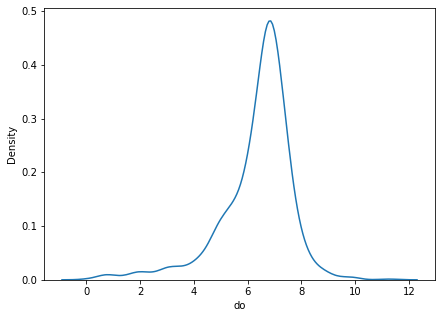

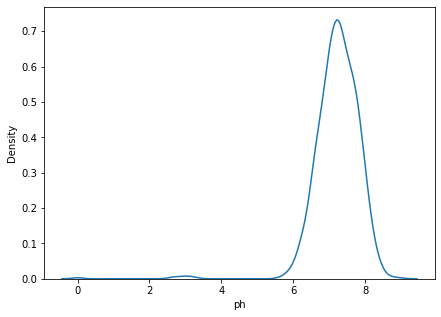

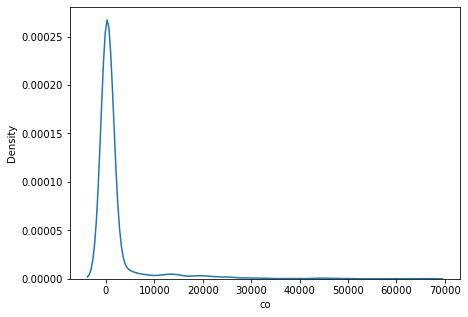

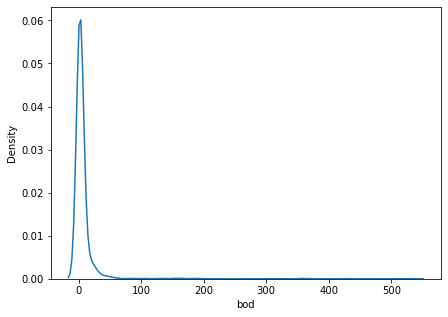

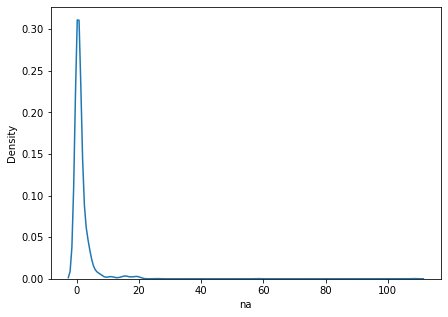

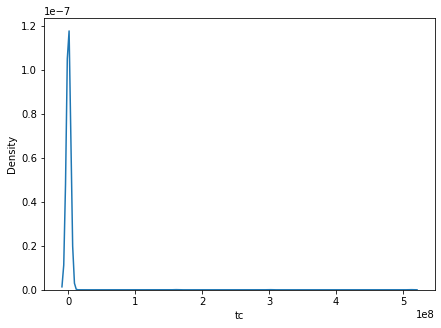

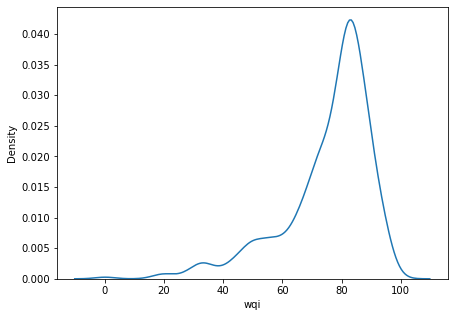

In [151]:
def plot_kde(df_new):
    n_col = df_new.shape[1]
    for index in range(n_col):
        col_index = df_new.iloc[:,index]
        fig, ax = plt.subplots(1,1, figsize =(7,5))
        sns.kdeplot(data=df_new,x=col_index.name)
        
plot_kde(df_new)

In [154]:
from scipy.stats import zscore
df_num_final_norm = zscore(df_new, axis=0)


def indices_of_greater_than_3(df_norm):
    df_norm = pd.DataFrame(df_norm)
    indices_arr = []
    n_col = df_norm.shape[1]
    for index in range(n_col):
        col_index = df_norm.iloc[: ,index]
        greater_than_3 = df_norm[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(df_num_final_norm)
print("Number of outliers using Z-Score method-",len(indices_arr))
df_new.iloc[indices_arr, :]

Number of outliers using Z-Score method- 114


,do,ph,co,bod,na,tc,wqi
737,11.10,7.60,131.0,3.6,0.10,32.0,86.52
741,11.40,7.20,128.0,1.0,0.10,20.0,91.20
35,5.30,7.70,24062.0,9.9,1.20,304.0,72.68
86,3.70,7.70,32005.0,1.2,0.90,60392.0,53.94
106,5.60,7.20,24360.0,2.1,0.30,447.0,82.04
...,...,...,...,...,...,...,...
1762,4.05,7.85,773.5,16.0,19.35,10.0,33.34
1763,6.25,7.90,770.0,14.0,19.40,10.0,61.44
170,0.90,7.60,2039.0,104.5,0.90,511090873.0,28.66
428,3.40,7.80,2577.0,164.9,1.50,160405392.0,30.54


In [155]:
df_final = df_new.drop(indices_arr,axis=0)

In [156]:
df_final.shape

(1672, 7)

In [157]:
df_new.shape

(1777, 7)

In [158]:
X_final=df_final.drop('wqi',axis=1)
y_final=df_final['wqi']

In [159]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size = 0.25,random_state=45)
X_train_final.shape

(1254, 6)

In [176]:
#Applying Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
gb = GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=6, random_state=42)
gb.fit(X_train_final, y_train_final)
y_predict = gb.predict(X_test_final)
print(y_predict.shape)

(418,)


In [178]:
k = X_test_final.shape[1]
n = len(X_test_final)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_final, y_predict)),'.3f'))
MSE = mean_squared_error(y_test_final, y_predict)
MAE = mean_absolute_error(y_test_final, y_predict)
r2 = r2_score(y_test_final, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
r2_gradb = r2
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 4.47 
MSE = 19.97880397182922 
MAE = 2.0137833972540435 
R2 = 0.8973223140053188 
Adjusted R2 = 0.8958233696842286


In [179]:
regressor_lasso = Lasso(alpha = 0.01)
regressor_lasso.fit(X_train_final,y_train_final)
print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)
y_predict = regressor_lasso.predict( X_test_final)

Linear Model Coefficient (m):  [ 5.11858594e+00  3.58765275e+00  9.00264941e-05 -5.46793682e-01
 -3.94316232e-01 -3.17863011e-05]
Linear Model Coefficient (b):  20.296085265887548


In [181]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_final, y_predict)),'.3f'))
MSE = mean_squared_error(y_test_final, y_predict)
MAE = mean_absolute_error(y_test_final, y_predict)
r2 = r2_score(y_test_final, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 9.633 
MSE = 92.78745290066018 
MAE = 6.510627788685337 
R2 = 0.5231345696862573 
Adjusted R2 = 0.5161730305575896


In [184]:
from sklearn.tree import DecisionTreeRegressor
Treereg = DecisionTreeRegressor()
Treereg.fit(X_train_final,y_train_final)
y_pred = Treereg.predict(X_test_final)
MSE = mean_squared_error(y_test_final, y_pred)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_final, y_pred)),'.3f'))
MAE = mean_absolute_error(y_test_final, y_pred)
r2 = r2_score(y_test_final, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
r2_tree = r2
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 5.693 
MSE = 32.41112057416268 
MAE = 1.792105263157907 
R2 = 0.8334285242629101 
Adjusted R2 = 0.8309968238871862


In [185]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_final,y_train_final)
y_pred = reg.predict(X_test_final)
MSE = mean_squared_error(y_test_final, y_pred)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_final, y_pred)),'.3f'))
MAE = mean_absolute_error(y_test_final, y_pred)
r2 = r2_score(y_test_final, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
r2_forest =r2
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 4.731 
MSE = 22.381901009569393 
MAE = 1.7404334928229825 
R2 = 0.8849720029755018 
Adjusted R2 = 0.8832927621430274


In [168]:
from sklearn.svm import SVR
SVreg = SVR()
SVreg.fit(X_train_final,y_train_final)
y_pred = SVreg.predict(X_test_final)
MSE = mean_squared_error(y_test_final, y_pred)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_final, y_pred)),'.3f'))
MAE = mean_absolute_error(y_test_final, y_pred)
r2 = r2_score(y_test_final, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 12.637 
MSE = 159.6813939988464 
MAE = 7.7317581071224675 
R2 = 0.17934446649934488 
Adjusted R2 = 0.1673640937475105


In [186]:
KNreg = KNeighborsRegressor()
KNreg.fit(X_train_final,y_train_final)
y_pred = KNreg.predict(X_test_final)
MSE = mean_squared_error(y_test_final, y_pred)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_final, y_pred)),'.3f'))
MAE = mean_absolute_error(y_test_final, y_pred)
r2 = r2_score(y_test_final, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
r2_knn =r2
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 12.677 
MSE = 160.71326193301437 
MAE = 8.275138755980862 
R2 = 0.17404135566839274 
Adjusted R2 = 0.16198356524019408


In [187]:
#Bayesian Ridge
from sklearn.linear_model import BayesianRidge
BRreg = BayesianRidge()
BRreg.fit(X_train_final,y_train_final)
y_pred = BRreg.predict(X_test_final)
MSE = mean_squared_error(y_test_final, y_pred)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_final, y_pred)),'.3f'))
MAE = mean_absolute_error(y_test_final, y_pred)
r2 = r2_score(y_test_final, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
r2_br=r2
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 9.642 
MSE = 92.96819788519056 
MAE = 6.514178332734594 
R2 = 0.5222056613895998 
Adjusted R2 = 0.5152305615558713


In [188]:
r2_lrNorm=1
r2_annNorm=0.99963

In [172]:
#ElasticNet
from sklearn.linear_model import ElasticNet
ENreg = ElasticNet()
ENreg.fit(X_train_final,y_train_final)
y_pred = ENreg.predict(X_test_final)
MSE = mean_squared_error(y_test_final, y_pred)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_final, y_pred)),'.3f'))
MAE = mean_absolute_error(y_test_final, y_pred)
r2 = r2_score(y_test_final, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 10.253 
MSE = 105.11397383746849 
MAE = 6.90020101135109 
R2 = 0.45978449888416684 
Adjusted R2 = 0.4518981412036438


In [ ]:
#Using Weighted parameters taken from official sources
wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0022])
# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 1000])
# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0])

def calc_wqi(sample): 
    wqi_sample = 0
    num_col = 6
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

#WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

wqi_arr = calc_wqi_for_df(df_num_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_final = df_final.reset_index()

In [173]:
X_train_final.head()

,do,ph,co,bod,na,tc
257,8.2,8.4,606.0,2.9,0.0,10.0
233,7.2,7.1,65.0,2.1,2.4,120.0
414,7.0,6.4,149.0,4.0,1.0,10.0
439,4.6,7.4,1284.0,24.3,4.0,50000.0
1644,5.9,7.8,692.0,11.1,3.5,222500.0


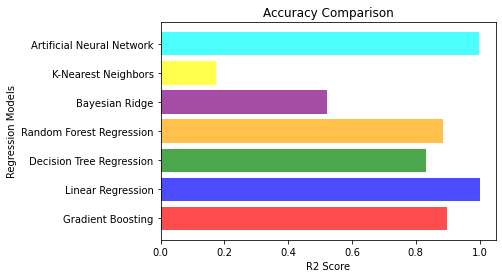

In [201]:
import matplotlib.pyplot as plt
labels = ['Gradient Boosting','Linear Regression','Decision Tree Regression','Random Forest Regression','Bayesian Ridge','K-Nearest Neighbors','Artificial Neural Network']
values = [r2_gradb,r2_lrNorm,r2_tree,r2_forest,r2_br,r2_knn,r2_annNorm]
#colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan']
colors = [(1, 0, 0, 0.7),  # Red
          (0, 0, 1, 0.7),  # Blue
          (0, 0.5, 0, 0.7),  # Green
          (1, 0.65, 0, 0.7),  # Orange
          (0.5, 0, 0.5, 0.7),  # Purple
          (1, 1, 0, 0.7),  # Yellow
          (0, 1, 1, 0.7)]  # Cyan

plt.barh(labels, values,color=colors)
plt.xlabel('R2 Score')
plt.ylabel('Regression Models')
plt.title('Accuracy Comparison')

plt.show()